<a href="https://colab.research.google.com/github/keinerfan/IAP123/blob/Codes/IAP123_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [1]:

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-07-27 09:53:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   224MB/s    in 0.4s    

2024-07-27 09:53:02 (224 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.

In [3]:
df = pd.read_csv('IAP123_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL441156,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,570.00,active
1,CHEMBL221137,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,4100.00,intermediate
2,CHEMBL414396,CC[C@H](C)[C@H](NC(=O)[C@H]1CCCN1C(=O)[C@@H](N...,2800.00,intermediate
3,CHEMBL404788,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,2830.00,intermediate
4,CHEMBL310987,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,570.00,active
...,...,...,...,...
1635,CHEMBL4084120,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.42,active
1636,CHEMBL4091245,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.52,active
1637,CHEMBL4070316,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.35,active
1638,CHEMBL4079500,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,6.08,active


In [5]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [6]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [7]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL441156,570.00,active,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...
1,CHEMBL221137,4100.00,intermediate,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O
2,CHEMBL414396,2800.00,intermediate,CC[C@H](C)[C@H](NC(=O)[C@H]1CCCN1C(=O)[C@@H](N...
3,CHEMBL404788,2830.00,intermediate,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...
4,CHEMBL310987,570.00,active,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...
...,...,...,...,...
1635,CHEMBL4084120,1.42,active,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...
1636,CHEMBL4091245,1.52,active,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...
1637,CHEMBL4070316,1.35,active,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...
1638,CHEMBL4079500,6.08,active,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...


In [8]:
! pip install rdkit

     |████████████████████████████████| 29.5 MB 53.6 MB/s 


In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [10]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [11]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,1272.340,-0.1802,12.0,18.0
1,294.391,4.3131,2.0,4.0
2,1070.257,-4.6098,15.0,16.0
3,1525.635,-1.3339,16.0,23.0
4,816.962,-3.4561,11.0,11.0
...,...,...,...,...
1635,609.771,3.5746,4.0,5.0
1636,744.941,3.7532,4.0,8.0
1637,816.020,3.2595,5.0,9.0
1638,928.236,6.3803,5.0,9.0


In [12]:
df_combined = pd.concat ([df , df_lipinski] , axis = 1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL441156,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,570.00,active,1272.340,-0.1802,12.0,18.0
1,CHEMBL221137,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,4100.00,intermediate,294.391,4.3131,2.0,4.0
2,CHEMBL414396,CC[C@H](C)[C@H](NC(=O)[C@H]1CCCN1C(=O)[C@@H](N...,2800.00,intermediate,1070.257,-4.6098,15.0,16.0
3,CHEMBL404788,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,2830.00,intermediate,1525.635,-1.3339,16.0,23.0
4,CHEMBL310987,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,570.00,active,816.962,-3.4561,11.0,11.0
...,...,...,...,...,...,...,...,...
1635,CHEMBL4084120,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.42,active,609.771,3.5746,4.0,5.0
1636,CHEMBL4091245,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.52,active,744.941,3.7532,4.0,8.0
1637,CHEMBL4070316,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.35,active,816.020,3.2595,5.0,9.0
1638,CHEMBL4079500,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,6.08,active,928.236,6.3803,5.0,9.0


In [14]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis =1)

    return x

In [15]:
df_combined.standard_value.describe()

count    1.640000e+03
mean     2.221298e+04
std      4.939923e+04
min      5.100000e-02
25%      5.800000e+01
50%      5.050000e+02
75%      1.759875e+04
max      1.200000e+06
Name: standard_value, dtype: float64

In [16]:
-np.log10( (10**-9)* 100000000 )

1.0

In [17]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis =  1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [19]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL441156,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,570.00,active,1272.340,-0.1802,12.0,18.0
1,CHEMBL221137,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,4100.00,intermediate,294.391,4.3131,2.0,4.0
2,CHEMBL414396,CC[C@H](C)[C@H](NC(=O)[C@H]1CCCN1C(=O)[C@@H](N...,2800.00,intermediate,1070.257,-4.6098,15.0,16.0
3,CHEMBL404788,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,2830.00,intermediate,1525.635,-1.3339,16.0,23.0
4,CHEMBL310987,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,570.00,active,816.962,-3.4561,11.0,11.0
...,...,...,...,...,...,...,...,...
1635,CHEMBL4084120,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.42,active,609.771,3.5746,4.0,5.0
1636,CHEMBL4091245,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.52,active,744.941,3.7532,4.0,8.0
1637,CHEMBL4070316,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,1.35,active,816.020,3.2595,5.0,9.0
1638,CHEMBL4079500,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,6.08,active,928.236,6.3803,5.0,9.0


In [20]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL441156,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,active,1272.340,-0.1802,12.0,18.0,570.00
1,CHEMBL221137,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,intermediate,294.391,4.3131,2.0,4.0,4100.00
2,CHEMBL414396,CC[C@H](C)[C@H](NC(=O)[C@H]1CCCN1C(=O)[C@@H](N...,intermediate,1070.257,-4.6098,15.0,16.0,2800.00
3,CHEMBL404788,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,intermediate,1525.635,-1.3339,16.0,23.0,2830.00
4,CHEMBL310987,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,active,816.962,-3.4561,11.0,11.0,570.00
...,...,...,...,...,...,...,...,...
1635,CHEMBL4084120,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,609.771,3.5746,4.0,5.0,1.42
1636,CHEMBL4091245,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,744.941,3.7532,4.0,8.0,1.52
1637,CHEMBL4070316,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,816.020,3.2595,5.0,9.0,1.35
1638,CHEMBL4079500,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,928.236,6.3803,5.0,9.0,6.08


In [21]:
df_norm.standard_value_norm.describe()

count    1.640000e+03
mean     2.221298e+04
std      4.939923e+04
min      5.100000e-02
25%      5.800000e+01
50%      5.050000e+02
75%      1.759875e+04
max      1.200000e+06
Name: standard_value_norm, dtype: float64

In [22]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL441156,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,active,1272.340,-0.1802,12.0,18.0,6.244125
1,CHEMBL221137,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,intermediate,294.391,4.3131,2.0,4.0,5.387216
2,CHEMBL414396,CC[C@H](C)[C@H](NC(=O)[C@H]1CCCN1C(=O)[C@@H](N...,intermediate,1070.257,-4.6098,15.0,16.0,5.552842
3,CHEMBL404788,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,intermediate,1525.635,-1.3339,16.0,23.0,5.548214
4,CHEMBL310987,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,active,816.962,-3.4561,11.0,11.0,6.244125
...,...,...,...,...,...,...,...,...
1635,CHEMBL4084120,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,609.771,3.5746,4.0,5.0,8.847712
1636,CHEMBL4091245,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,744.941,3.7532,4.0,8.0,8.818156
1637,CHEMBL4070316,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,816.020,3.2595,5.0,9.0,8.869666
1638,CHEMBL4079500,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,928.236,6.3803,5.0,9.0,8.216096


In [23]:
df_final.pIC50.describe()

count    1640.000000
mean        6.114062
std         1.496730
min         2.920819
25%         4.754521
50%         6.296709
75%         7.236572
max        10.292430
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [24]:
df_final.to_csv('IAP123_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [25]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL441156,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,active,1272.340,-0.1802,12.0,18.0,6.244125
4,CHEMBL310987,C[C@H](N)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@...,active,816.962,-3.4561,11.0,11.0,6.244125
5,CHEMBL375349,CC[C@H](N)C(=O)N[C@H]1CCC[C@H]2CC[C@@H](C(=O)N...,active,462.594,2.6578,3.0,4.0,6.337242
6,CHEMBL218832,CC[C@H](NC)C(=O)N[C@H]1CCC[C@H]2CC[C@@H](C(=O)...,active,476.621,2.9185,3.0,4.0,6.275724
7,CHEMBL573550,CC[C@H](N)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]1...,active,492.620,1.8762,4.0,5.0,6.568636
...,...,...,...,...,...,...,...,...
1635,CHEMBL4084120,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,609.771,3.5746,4.0,5.0,8.847712
1636,CHEMBL4091245,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,744.941,3.7532,4.0,8.0,8.818156
1637,CHEMBL4070316,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,816.020,3.2595,5.0,9.0,8.869666
1638,CHEMBL4079500,CC[C@H](NC)C(=O)N[C@@H]1C(=O)N2[C@@H](CC[C@@H]...,active,928.236,6.3803,5.0,9.0,8.216096


Let's write this to CSV file.

In [26]:
df_2class.to_csv('IAP123_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [27]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

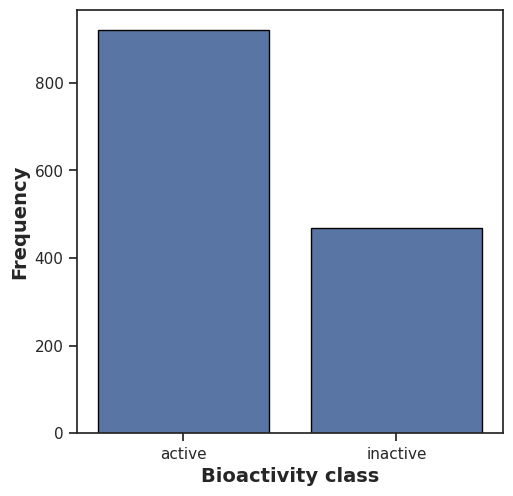

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

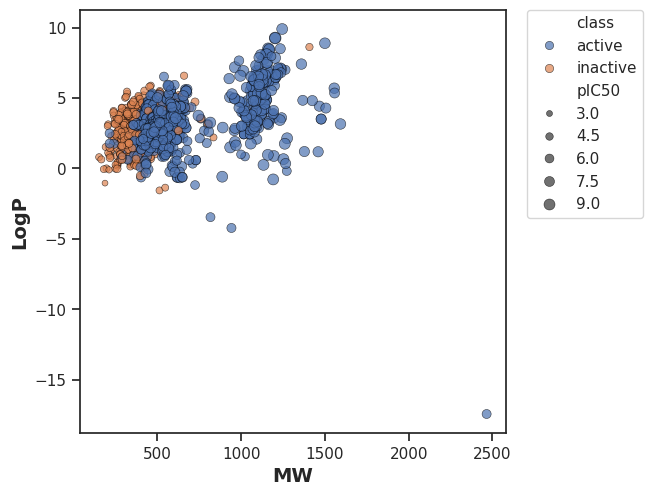

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

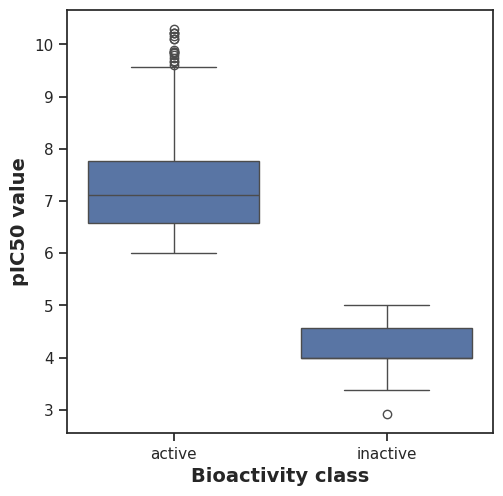

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [31]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [32]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,431949.0,1.095328e-205,0.05,Different distribution (reject H0)


#### **MW**

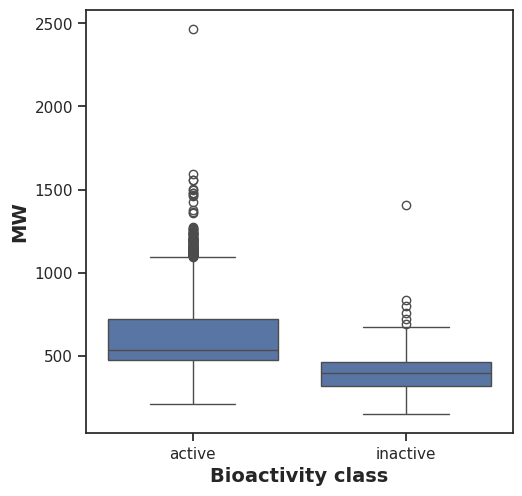

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [34]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,367685.5,5.649975e-102,0.05,Different distribution (reject H0)


#### **LogP**

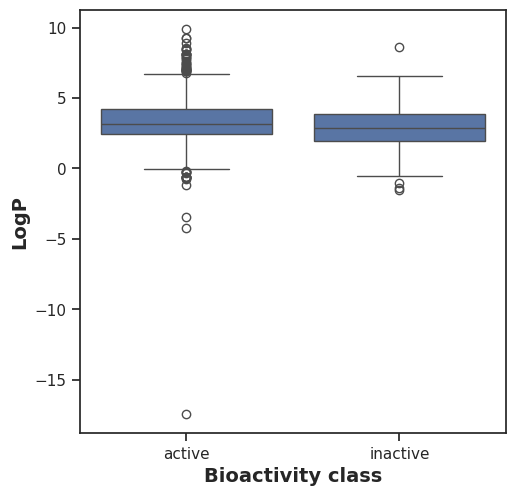

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [36]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,254325.5,5.967101e-08,0.05,Different distribution (reject H0)


#### **NumHDonors**

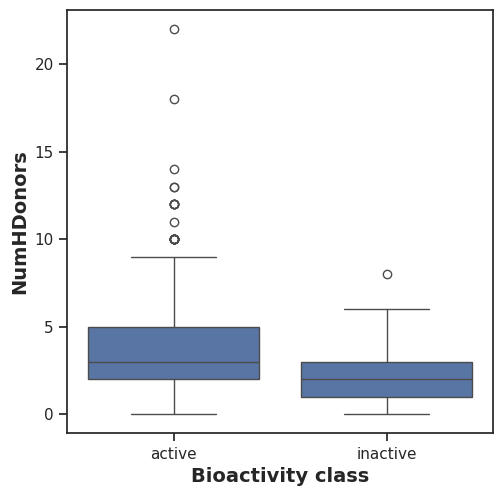

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [38]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,311981.0,1.528733e-43,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

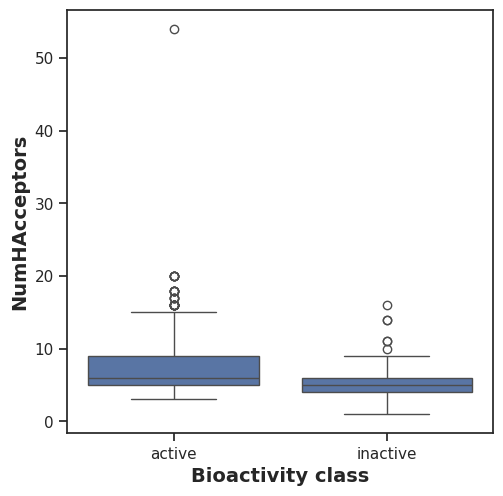

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [40]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,327835.5,9.702622e-58,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [41]:
! zip -r results_combination.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: IAP123_03_bioactivity_data_curated.csv (deflated 86%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: IAP123_04_bioactivity_data_3class_pIC50.csv (deflated 80%)
  adding: IAP123_05_bioactivity_data_2class_pIC50.csv (deflated 80%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
